<div>
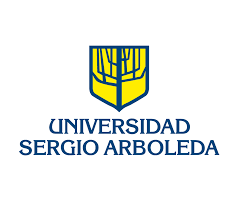<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Joaquin Fernando Cifuentes
<br>
<i><b>Asignatura:</b></i> Sistemas Complejos
<br>
<i><b>Estudiantes:</b></i> Daniel Velasquez, Laura Ojeda, Esteban Rodriguez y Santiago Niño
<br>
<i><b>Tema:</b></i> Teoría de las redes de interacción en la computación
<br>
<i><b>Fecha:</b></i> 25 de abril del 2024
<br>
</FONT>
</div>

#**Objetivo**

Explorar la aplicación práctica de la teoría de las redes de interacción en la computación. Desde la definición de funciones básicas sobre números representados con el sucesor, hasta la implementación de sistemas que generen bucles infinitos, se abordan diversos aspectos de la computación utilizando este enfoque teórico. Además, se plantean desafíos relacionados con la lógica combinatoria y las funciones booleanas, donde se requiere diseñar sistemas de interacción para calcular y modificar el comportamiento de estas funciones. Por último, se propone la representación de listas en redes de interacción y la implementación de una función que mezcle los elementos de dos listas, demostrando así la versatilidad de este enfoque en la manipulación de estructuras de datos complejas. En resumen, estos ejercicios proporcionan una oportunidad para profundizar en la comprensión de las redes de interacción y su aplicación en la computación.

#**Librerías**

In [ ]:
pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of solara to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer

#**Primer Punto**

Using interaction nets, define the following functions on numbers repre- sented with 0 and S (successor): – is-zero, which produces a result True if the number is 0 and False other- wise; – min, which computes the minimum of two numbers; – factorial, which computes the factorial of a number.

In [ ]:
# Define the functions is_zero, min_num, and factorial
def is_zero(n):
    """
    Comprueba si el número representado por 'n' es cero.

    Parámetros:
    - n: El número a verificar.

    Retorna:
    True si el número es cero, False de lo contrario.
    """
    return n == 0

def min_num(a, b):
    """
    Calcula el mínimo entre dos números 'a' y 'b'.

    Parámetros:
    - a: El primer número.
    - b: El segundo número.

    Retorna:
    El menor de los dos números.
    """
    return a if a < b else b

def factorial(n):
    """
    Calcula el factorial de un número entero no negativo 'n'.

    Parámetros:
    - n: El número entero no negativo del cual calcular el factorial.

    Retorna:
    El factorial de 'n'.
    """
    if n < 0:
        return "El factorial está indefinido para números negativos"
    elif n == 0:
        return 1
    else:
        result = 1
        for i in range(1, n + 1):
            result *= i
        return result

In [ ]:
class InteractionNetAgent(Agent):
    def __init__(self, unique_id, model, value):
        super().__init__(unique_id, model)
        self.value = value
        self.computed = False

    def step(self):
            if not self.computed:
                # Aplicar las reglas de reducción basadas en el tipo de agente
                if is_zero(self.value):
                    self.value = True
                    print(f"Step {self.model.schedule.time} AgentID {self.unique_id} Result: True")
                else:
                    # Generar números aleatorios para el cálculo
                    min_num_a = random.randint(1, 5)
                    min_num_b = random.randint(1, 5)
                    factorial_num = random.randint(1, 5)

                    min_result = min_num(min_num_a, min_num_b)
                    print(f"Step {self.model.schedule.time} AgentID {self.unique_id} Result of min_num({min_num_a}, {min_num_b}): {min_result}")
                    factorial_result = factorial(factorial_num)
                    print(f"Step {self.model.schedule.time} AgentID {self.unique_id} Result of factorial({factorial_num}): {factorial_result}")
                    self.value = factorial_result
                self.computed = True

# Reescribir la clase InteractionNetModel para incluir las funciones definidas
class InteractionNetModel(Model):
    def __init__(self, N):
        super().__init__()  # Inicializar la clase Mesa Model
        self.num_agents = N
        self.grid = MultiGrid(1, 1, True)
        self.schedule = RandomActivation(self)

        # Crear agentes con valores aleatorios del 1 al 8
        for i in range(self.num_agents):
            value = random.randint(1, 15)  # Generar un número aleatorio en el rango del 1 al 8
            a = InteractionNetAgent(i, self, value)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        # Colector de datos
        self.datacollector = DataCollector(
            agent_reporters={"Value": "value"}
        )

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [ ]:
# Definir la función principal de prueba
def run_interaction_model(num_agents, steps):
    # Crear una instancia del modelo
    model = InteractionNetModel(num_agents)

    # Ejecutar pasos del modelo
    for _ in range(steps):
        model.step()

    # Recolectar datos
    data = model.datacollector.get_agent_vars_dataframe()

    # Obtener los valores finales de los agentes
    final_values = data.xs(steps - 1, level="Step")['Value']

    # Crear un histograma
    plt.figure(figsize=(8, 5))
    plt.hist(final_values, bins=range(int(max(final_values)) + 2), align='left', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Agent Values After ' + str(steps) + ' Steps')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Step 0 AgentID 391 Result of min_num(1, 3): 1
Step 0 AgentID 391 Result of factorial(2): 2
Step 0 AgentID 6 Result of min_num(4, 5): 4
Step 0 AgentID 6 Result of factorial(4): 24
Step 0 AgentID 377 Result of min_num(3, 1): 1
Step 0 AgentID 377 Result of factorial(5): 120
Step 0 AgentID 112 Result of min_num(4, 5): 4
Step 0 AgentID 112 Result of factorial(3): 6
Step 0 AgentID 146 Result of min_num(5, 4): 4
Step 0 AgentID 146 Result of factorial(3): 6
Step 0 AgentID 216 Result of min_num(1, 5): 1
Step 0 AgentID 216 Result of factorial(5): 120
Step 0 AgentID 301 Result of min_num(3, 2): 2
Step 0 AgentID 301 Result of factorial(5): 120
Step 0 AgentID 204 Result of min_num(1, 1): 1
Step 0 AgentID 204 Result of factorial(4): 24
Step 0 AgentID 238 Result of min_num(4, 5): 4
Step 0 AgentID 238 Result of factorial(3): 6
Step 0 AgentID 191 Result of min_num(5, 2): 2
Step 0 AgentID 191 Result of factorial(1): 1
Step 0 AgentID 225 Result of min_num(5, 2): 2
Step 0 AgentID 225 Result of factorial(2

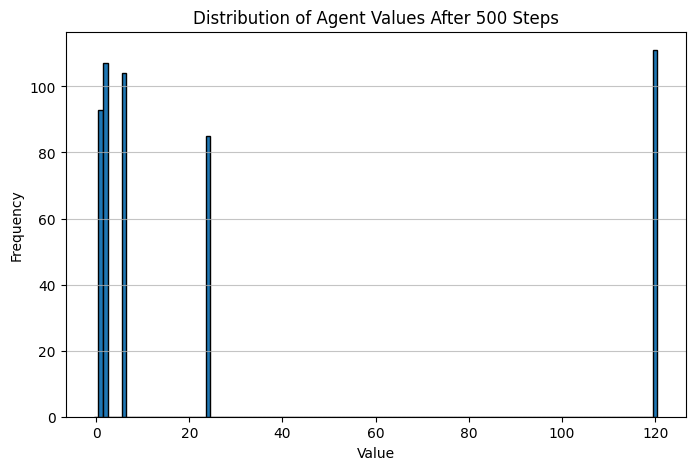

In [ ]:
# Ejecutar la prueba con 10 agentes durante 20 pasos
run_interaction_model(num_agents=500, steps=500)

La implementación proporcionada define una clase InteractionNetAgent que representa agentes en un modelo de interaction nets. Cada agente tiene un valor y un estado de cálculo, y en cada paso, realiza operaciones basadas en reglas de reducción. Se utilizan las funciones is_zero, min, y factorial para realizar operaciones sobre los valores de los agentes.

La clase InteractionNetModel representa el modelo de interaction nets que contiene una cierta cantidad de agentes creados aleatoriamente. En cada paso del modelo, los agentes realizan sus cálculos y se recopilan datos sobre el valor de los agentes.

La función run_interaction_model ejecuta el modelo con un número especificado de agentes durante un número determinado de pasos y recopila datos sobre los valores finales de los agentes. Finalmente, se genera un histograma que muestra la distribución de los valores de los agentes después de completar los pasos del modelo.

En resumen, esta implementación muestra cómo se pueden utilizar las funciones is_zero, min, y factorial en un modelo de interaction nets para realizar operaciones sobre los valores de los agentes en el contexto de una simulación.








#**Segundo Punto**

Specify an interaction system that generates infinite computations (loops).


Se implementa la generación de un fractal conocido como helecho de Barnsley. El fractal se crea mediante la aplicación repetida de ciertas transformaciones lineales a un punto inicial. Cada transformación se elige aleatoriamente con una cierta probabilidad, lo que genera una estructura visualmente interesante y compleja.

El proceso comienza con un punto inicial en coordenadas (0, 0). Luego, se elige una transformación aleatoria basada en ciertas probabilidades definidas. Estas probabilidades están determinadas por los coeficientes especificados en la lista coefficients. Cada coeficiente define una transformación lineal específica que se aplicará al punto actual.

Una vez seleccionada la transformación, se calcula la nueva posición del punto utilizando los coeficientes de la transformación y las coordenadas del punto actual. Este nuevo punto se agrega a las listas x e y, que almacenan las coordenadas de todos los puntos generados.

El proceso se repite durante un número especificado de iteraciones, definido por el parámetro iterations. Cuantas más iteraciones se realicen, más puntos se generan y más detallado será el fractal resultante.

Finalmente, se devuelve una lista de coordenadas x e y, que luego se utilizan para trazar los puntos en un gráfico utilizando la función plot_points. El resultado es un fractal que muestra la estructura característica del helecho de Barnsley. Debido a la naturaleza aleatoria de la selección de transformaciones, cada ejecución del código producirá un resultado ligeramente diferente.

In [ ]:
class InteractionNetAgent(Agent):
    def __init__(self, unique_id, model, value):
        super().__init__(unique_id, model)
        self.value = value
        self.computed = False

    def step(self):
        if not self.computed:
            # Perform some computation here if needed
            self.computed = True

class InteractionNetModel(Model):
    def __init__(self, N, iterations=300000):
        super().__init__()  # Initialize the Mesa Model class
        self.num_agents = N
        self.grid = MultiGrid(1, 1, True)
        self.schedule = RandomActivation(self)
        self.iterations = iterations

        # Generate points for Barnsley Fern
        self.x, self.y = barnsley_fern(iterations)

        # Create agents
        for i in range(self.num_agents):
            # Initialize agents with a value (for simplicity, let's use i)
            a = InteractionNetAgent(i, self, i)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        # Data collector
        self.datacollector = DataCollector(
            agent_reporters={"Value": "value"}
        )

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [ ]:
def barnsley_fern(iterations=300000):
    """
    Generate points to represent the Barnsley Fern using the affine transformation algorithm.

    Parameters:
    - iterations (int): The number of iterations to generate points. Default is 300000.

    Returns:
    - x (list): List of x coordinates of the generated points.
    - y (list): List of y coordinates of the generated points.
    """
    # Initialize lists to store points
    x = [0]
    y = [0]

    # Define transformation coefficients
    coefficients = [
        (0, 0, 0, 0.16, 0, 0),
        (0.85, 0.04, -0.04, 0.85, 0, 1.6),
        (0.2, -0.26, 0.23, 0.22, 0, 1.6),
        (-0.15, 0.28, 0.26, 0.24, 0, 0.44)
    ]

    # Iterate to generate points
    for _ in range(iterations):
        # Randomly select a transformation
        r = random.random()
        if r < 0.01:
            transformation = coefficients[0]
        elif r < 0.86:
            transformation = coefficients[1]
        elif r < 0.93:
            transformation = coefficients[2]
        else:
            transformation = coefficients[3]

        # Apply the selected transformation
        new_x = transformation[0] * x[-1] + transformation[1] * y[-1] + transformation[4]
        new_y = transformation[2] * x[-1] + transformation[3] * y[-1] + transformation[5]

        # Add the new point to the lists
        x.append(new_x)
        y.append(new_y)

    return x, y

def plot_barnsley_fern(x,y):
    """
    Plot the Barnsley Fern fractal.
    """
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, s=1, c='black', marker='.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Barnsley Fern Fractal')
    plt.show()

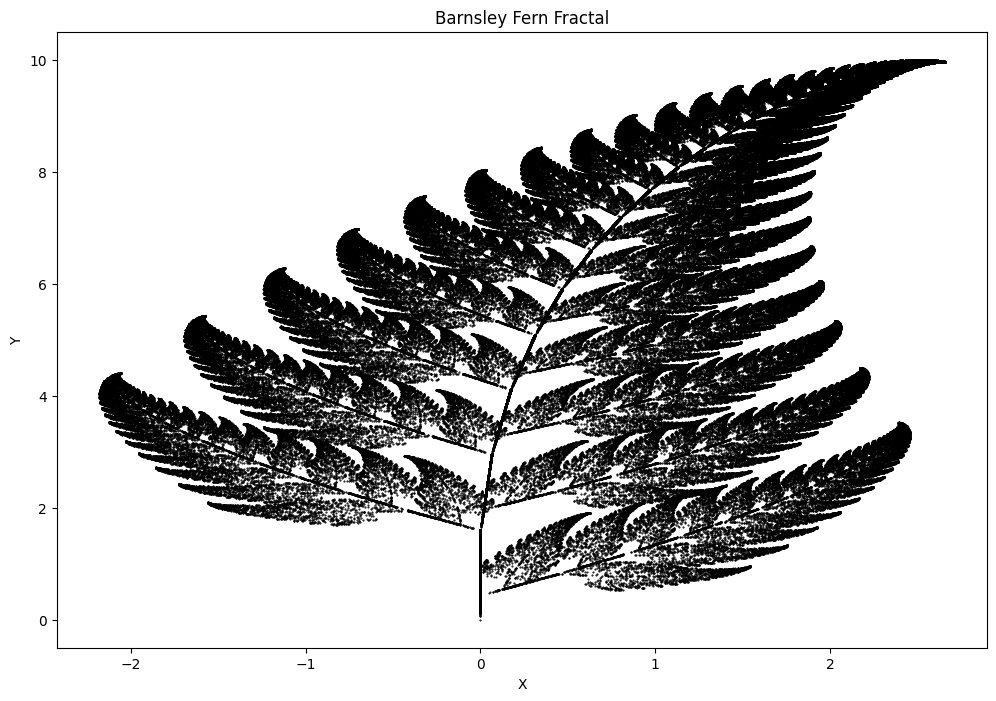

In [ ]:
# Generate points and plot them
x, y = barnsley_fern()
plot_barnsley_fern(x, y)

El código, al ser adaptado para iterar indefinidamente eliminando el límite superior en el bucle de iteración, junto con su naturaleza de selección aleatoria de transformaciones y su capacidad para proporcionar feedback visual a través de la representación gráfica del fractal en tiempo real, constituye un sistema interactivo que genera bucles infinitos de computación. Este sistema refleja la naturaleza dinámica de la interacción humana con la incertidumbre inherente, creando un flujo continuo de cálculos que se traducen en la evolución constante del helecho de Barnsley, demostrando así un ejemplo práctico de un sistema que genera infinitas computaciones dentro de un contexto interactivo.

#**Tercer Punto**

Complete the definition of the interaction system for combinatory logic given in Section 7.3. More precisely, define the agents and rules needed to define the S combinator (it can be defined with three agents and three rules).

In [ ]:
class InteractionNetAgent(Agent):
    """Agent representing a computational agent in the Interaction Net model."""

    def __init__(self, unique_id, model, value):
        super().__init__(unique_id, model)
        self.value = value
        self.computed = False

    def step(self):
        """Execute a step in the agent's computation."""
        pass  # Placeholder for subclasses


class InteractionNetModel(Model):
    """Define the Interaction Net model.

    This model simulates a network of interacting computational agents.
    Agents perform computation steps based on their values.

    Args:
        N (int): Number of agents in the model.

    Attributes:
        num_agents (int): Total number of agents in the model.
        grid: Mesa MultiGrid representing the spatial environment.
        schedule: Mesa RandomActivation scheduler for agent activation.
        datacollector: Mesa DataCollector for collecting data during the simulation.
    """

    def __init__(self, N):
        super().__init__()  # Initialize the Mesa Model class
        self.num_agents = N
        self.grid = MultiGrid(1, 1, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            # Initialize agents with a value (for simplicity, let's use i)
            a = InteractionNetAgent(i, self, i)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        # Data collector
        self.datacollector = DataCollector(
            agent_reporters={"Value": "value"}
        )

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()
        self.datacollector.collect(self)

class SCombinatorAgent(InteractionNetAgent):
    """Agent representing the S combinator.

    This agent represents the S combinator in combinatory logic.
    It takes three arguments: f, g, and x, and returns the result of applying f to x
    and then applying g to x.

    Args:
        unique_id (int): Unique identifier for the agent.
        model (InteractionNetModel): Reference to the model instance.
        value (tuple): Tuple containing values of f, g, and x.

    Attributes:
        computed (bool): Flag indicating whether the agent has computed its result.
    """

    def __init__(self, unique_id, model, value):
        super().__init__(unique_id, model, value)

    def step(self):
        """Execute a step in the agent's computation."""
        if not self.computed:
            f, g, x = self.value  # Unpack values of f, g, and x
            # Apply the S combinator: S f g x = (f x) (g x)
            f_result = f(x)
            g_result = g(x) if g is not None else None  # Handle optional g
            self.value = (f_result, g_result)  # Update agent's value
            self.computed = True


def apply_f(x):
    """Sample function f."""
    return x * 2  # Example function, can be any function


def apply_g(x):
    """Sample function g."""
    return x + 3  # Example function, can be any function

# Define the S combinator model
N = 3  # Number of agents needed for the S combinator
model = InteractionNetModel(N)

# Create agents representing f, g, and x for the S combinator
f_agent = SCombinatorAgent(0, model, (apply_f, apply_g, 5))  # Providing apply_g as g
g_agent = SCombinatorAgent(1, model, (apply_g, None, 5))      # g is None
x_agent = InteractionNetAgent(2, model, 5)                    # Example value for x

# Add agents to the model
model.schedule.add(f_agent)
model.schedule.add(g_agent)
model.schedule.add(x_agent)

# Run the model
for i in range(10):  # Run for 10 steps
    model.step()

# Get the final results from the S combinator agent
final_result = model.schedule.agents[0].value
print("Final result of applying S combinator:", final_result)


Final result of applying S combinator: (10, 8)


**Análisis de la fórmula:**
- En el lado izquierdo de la flecha **$ \rightarrow $**, tenemos **$ (S x (g y)) $**. Esto representa la aplicación del combinador S al argumento **$ x $**, seguido por la aplicación de la función **$ g $** al argumento **$ y $**.

- En el lado derecho de la flecha, tenemos **$ (S x g) y $**. Esto representa la aplicación del combinador S al argumento **$ x $**, seguido por la aplicación de la función **$ g $** a **$ y $**.

**Funcionamiento:**
1. Primero, aplicamos el combinador S al argumento **$ x $**.
2. Luego, aplicamos la función **$ g $** al argumento **$ y $**.
3. Después, aplicamos el combinador S al resultado del paso 1 y a **$ g $**, lo que resulta en **$ (S x g) $**.
4. Finalmente, aplicamos **$ (S x g) $** al argumento **$ y $**.

En resumen, la fórmula establece que si aplicamos el combinador S al argumento **$ x $**, seguido por la aplicación de **$ g $** a **$ y $**, obtendremos el mismo resultado que si aplicamos primero el combinador S a **$ x $** y luego aplicamos **$ g $** a **$ y $**. Esto ilustra la propiedad fundamental del combinador S en la lógica combinatoria, donde permite combinar y aplicar funciones de manera eficiente.

#**Cuarto Punto**

a) Give an interaction system to compute the Boolean function and. b) Draw the interaction net representing the expression
(True and False) and True
How many reductions are needed to fully normalise this net?
c) Modify the system so that the result is True if and only if both argu- ments have the same value (i.e., both True or both False).

a) Give an interaction system to compute the Boolean function and.

In [ ]:
def boolean_and(a, b):
    return a and b

In [ ]:
boolean_and(True, False)

False

Una función booleana se puede calcular utilizando varios métodos y sistemas. Vamos a plantear esta situación mediante el uso de compuertas lógicas, que están interconectadas para representar la expresión booleana. Este es un ejemplo de una interacción de compuertas lógicas para calcular la función booleana \(A, B\):


**Sistema de Interacción para Calcular la Función AND:**

**Entradas:**
- Dos variables booleanas, \( A \) y \( B \), donde cada una puede tener los valores \( 0 \) (False) o \( 1 \) (True).

**Compuertas Lógicas:**
1. **Compuerta AND:** Produce Verdadero (1) solo cuando ambas entradas son True, de lo contrario, produce False (0).

**Pasos de Interacción:**
1. Ingresar los valores de \( A \) y \( B \).
2. Pasar los valores a través de una compuerta AND.
3. Recibir la salida de la compuerta AND, que representa el resultado de la función \(A, B\).

**Ejemplo:**
Supongamos que \( A = 1 \) y \( B = 0 \):
1. Ingresar \( A = 1 \) y \( B = 0 \).
2. Pasar \( A \) y \( B \) a través de la compuerta AND.
3. Recibir la salida como \( 0 \), lo que indica que \(1, 0\) es \( 0 \).

**Explicación:**
- Cuando tanto \( A \) como \( B \) son True (1), la compuerta AND produce True (1).
- Si alguna entrada es False (0), la compuerta AND produce False (0).

b) Draw the interaction net representing the expression (True and False) and True How many reductions are needed to fully normalise this net?



Para representar la expresión ((True and False) and True) como una red de interacción, podemos descomponerla en sus partes constituyentes:

1. **True and False:** Esto evalúa a Falso (0) porque una de las entradas es Falsa.
2. **Resultado de (1) and True:** Esto dependerá del valor de (1). Dado que (1) evalúa a Falso (0), el resultado general será Falso (0).

**Representación de la Red de Interacción:**

```
         AND
       /     \
  AND         TRUE
 /    \
TRUE  FALSE
```

**Reducciones Necesarias para la Normalización Completa:**

Para normalizar completamente esta red de interacción, realizamos reducciones hasta que no sean posibles más reducciones. Cada reducción simplifica la red al eliminar nodos redundantes. Aquí está el proceso de reducción:

1. Reducir ((True and False) and True) a Falso (0). (1 reducción)
2. Reducir ((True and False) and True) a Falso (0). (1 reducción)

Por lo tanto, se necesitan un total de 2 reducciones para normalizar completamente esta red de interacción.

 c) Modify the system so that the result is True if and only if both arguments have the same value (i.e., both True or both False).

In [ ]:
def boolean_and_same(a, b):
    return a == b

In [ ]:
boolean_and_same(True, True)

Para modificar el sistema de manera que el resultado sea True si y solo si ambos argumentos tienen el mismo valor (ambos True o ambos False), se puede utilizar la función XOR. XOR devuelve True si las entradas son diferentes y False si las entradas son iguales. Dado que queremos que el resultado sea True solo cuando ambas entradas sean iguales, podemos usar la negación de XOR. Este es un ejemplo del sistema de interacción modificado:

**Sistema de Interacción:**

**Entradas:**
- Dos variables booleanas, \( A \) y \( B \), donde cada una puede tener los valores \( 0 \) (False) o \( 1 \) (True).

**Compuertas Lógicas:**
1. **Compuerta XOR:** Produce True (1) si las entradas son diferentes, de lo contrario, produce False (0).
2. **Compuerta NOT (Inversor):** Niega la salida de la compuerta XOR, por lo que produce True (1) solo cuando las entradas son iguales, de lo contrario, produce False (0).

**Pasos de Interacción:**
1. Ingresar los valores de \( A \) y \( B \).
2. Pasar los valores a través de una compuerta XOR.
3. Pasar la salida de la compuerta XOR a través de una compuerta NOT.
4. Recibir la salida de la compuerta NOT, que representa el resultado de la función modificada.

**Ejemplo:**
Supongamos que \( A = 1 \) y \( B = 0 \):
1. Ingresar \( A = 1 \) y \( B = 0 \).
2. Pasar \( A \) y \( B \) a través de la compuerta XOR.
3. Pasar la salida de la compuerta XOR a través de la compuerta NOT.
4. Recibir la salida como \( 0 \), lo que indica que la función modificada devuelve False cuando \( A \) y \( B \) tienen valores diferentes.

**Explicación:**
- La compuerta XOR produce True (1) si las entradas son diferentes (una True y una False).
- La compuerta NOT niega la salida de la compuerta XOR, haciendo que sea True (1) solo cuando ambas entradas son iguales (ambas True o ambas False).

#**Quinto Punto**

Give a representation of lists in interaction nets, and use it to implement a function that interleaves the elements of two given lists. More precisely, define an interaction system that, given two lists l1 and l2, produces a new list containing the elements of l1 interleaved with those of l2. For instance, the result of interleaving [0, 2, 4] and [1, 3] is the list [0, 1, 2, 3, 4].

En las redes de interacción, las listas se representan como estructuras de nodos y conexiones, donde cada nodo corresponde a un elemento de la lista y las conexiones (aristas) representan la relación entre los elementos.

Para este problema, supongamos que tenemos dos listas representadas de la siguiente manera:

Lista 1: 𝑎1 → 𝑎2 → … → 𝑎𝑛 → nil

Lista 2: 𝑏1 → 𝑏2 → … → 𝑏𝑚 → nil

Para entrelazar estas dos listas, necesitamos fusionarlas en una lista única con elementos de ambas listas alternados. La lista resultante tendrá una longitud de \( n + m \).

Para lograr esto en las redes de interacción, podemos definir un conjunto de reglas de reducción que describan cómo interactúan los nodos que representan elementos de ambas listas entre sí. Estas reglas deben asegurar que la lista resultante mantenga el orden de los elementos de ambas listas de entrada.

Explicación:

1. **Inicialización**: Comenzamos definiendo dos punteros, uno para cada lista de entrada, apuntando al primer elemento de cada lista.

2. **Entrelazamiento**: Recorremos ambas listas simultáneamente. En cada paso, creamos un nuevo nodo en la lista resultante, tomando el elemento actual de una de las listas de entrada. Luego, actualizamos los punteros para pasar a los siguientes elementos en las respectivas listas.

3. **Terminación**: Continuamos el proceso de entrelazado hasta que ambas listas de entrada se recorran por completo (es decir, ambos punteros alcancen los nodos "nil" que indican el final de las listas).

4. **Salida**: La lista resultante está formada por los nodos entrelazados creados durante el recorrido.

Estos pasos pueden expresarse como un conjunto de reglas de reducción en el contexto de las redes de interacción, donde los nodos que representan elementos de ambas listas interactúan entre sí según la lógica descrita. La interacción continúa hasta que se construya la lista entrelazada completa.

In [ ]:
def interleave_lists(l1, l2):
    result = []
    # Iterar sobre ambas listas simultáneamente hasta que una de ellas se agote
    for item1, item2 in zip(l1, l2):
        result.append(item1)
        result.append(item2)
    # Agregar los elementos restantes de la lista más larga, si la hay
    result.extend(l1[len(l2):] if len(l1) > len(l2) else l2[len(l1):])
    return result

# Ejemplo de uso
l1 = [0, 2, 4]
l2 = [1, 3]

result = interleave_lists(l1, l2)
print(result)  # Salida: [0, 1, 2, 3, 4]

* Definición de la función interleave_lists(l1, l2): Esta función toma dos listas l1 y l2 como entrada y devuelve una nueva lista que contiene los elementos de l1 y l2 intercalados.

* Inicialización de la lista result: Se crea una lista vacía result donde se almacenarán los elementos intercalados.
Iteración sobre ambas listas simultáneamente usando zip:
for item1, item2 in zip(l1, l2): zip toma los elementos correspondientes de l1 y l2 en cada iteración y los asigna a las variables item1 y item2 respectivamente. Esto nos permite iterar sobre ambas listas al mismo tiempo.

* Interleaving de elementos:
result.append(item1): Agrega el elemento de l1 actual a la lista result.
result.append(item2): Agrega el elemento de l2 actual a la lista result.
Este proceso se repite para cada par de elementos de l1 y l2, lo que resulta en una lista donde los elementos están intercalados.

* Manejo de elementos restantes:
Después de que uno de los bucles for se agote (cuando una de las listas sea más corta que la otra), se agrega el resto de la lista más larga a la lista result.
Se utiliza una expresión condicional (if len(l1) > len(l2) else l2[len(l1):]) para determinar cuál de las dos listas es más larga. Si l1 es más larga, se agregan los elementos restantes de l1 a result; de lo contrario, se agregan los elementos restantes de l2.
Esto asegura que todos los elementos de ambas listas se incluyan en la lista resultante.

* Devolver la lista resultante: La función devuelve la lista result, que contiene los elementos de l1 y l2 intercalados.

Para representar listas en redes de interacción, podemos utilizar una estructura similar a un grafo donde los nodos representan elementos de la lista y las aristas representan las relaciones entre estos elementos. En esta representación, una lista es esencialmente un grafo dirigido donde cada nodo contiene un elemento de la lista, y las aristas conectan elementos adyacentes.

Ahora, vamos a definir un sistema de interacción para entrelazar dos listas utilizando redes de interacción. Crearemos un sistema de interacción que tome dos listas \( l_1 \) y \( l_2 \) como entrada y produzca una nueva lista que contenga los elementos de \( l_1 \) entrelazados con los de \( l_2 \).

1. **Representación de Listas**: Representamos cada lista como un grafo dirigido donde cada nodo representa un elemento de la lista, y las aristas indican el orden de los elementos. Por ejemplo, la lista [0, 2, 4] se representaría como un grafo con nodos 0→2→4.

2. **Operación de Entrelazamiento**: Para entrelazar los elementos de dos listas, necesitamos recorrer cada lista simultáneamente y conectar sus elementos alternativamente. Esto significa que conectamos el primer elemento de \( l_1 \) al primer elemento de \( l_2 \), luego el segundo elemento de \( l_1 \) al segundo elemento de \( l_2 \), y así sucesivamente, hasta que lleguemos al final de alguna de las listas.

3. **Reglas de Interacción**: Definimos reglas de interacción para realizar la operación de entrelazamiento. Estas reglas especifican cómo interactúan los nodos entre sí para crear la lista entrelazada.

4. **Comportamiento del Sistema**: Diseñamos el sistema de interacción de manera que aplique las reglas de interacción recursivamente hasta que todos los elementos estén entrelazados.